In [40]:
from utilities_jonny import calculate_row_column_indices

# Example usage:
n = 2  # Number of plots
c = 3   # Number of columns

indices = calculate_row_column_indices(n, c)
print(indices)

[(0, 0), (0, 1)]


In [44]:
%load_ext autoreload
%autoreload 2
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utilities_jonny import calculate_row_column_indices


# Generate a synthetic dataset
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Introduce misclassifications for a more realistic scenario
y[np.random.choice(np.where(y == 0)[0], 5)] = 1
y[np.random.choice(np.where(y == 1)[0], 5)] = 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def slack_analysis(C=[1.0]):
    """
    # Define and train a soft-margin SVM with slack variables
    C =   # Regularization parameter [list]
    """
    n = len(C)

    cols = 2
    indices = calculate_row_column_indices(n,cols)
    rows = int(max([ind[0] for ind in indices])+1)
    fig_size = 5
    fig,axs = plt.subplots(rows,cols,figsize=(fig_size*cols, fig_size*rows))
    axs = axs.flatten()

    for i,c in enumerate(C):
        # print(indices[i])
        # print(np.shape(axs))
        ax = axs[i]
        clf = svm.SVC(kernel='linear', C=c)
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Plot the decision boundary and support vectors
        
        # Plot data points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o');

        # Plot the decision boundary
        # ax = ax.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create grid to evaluate model
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                            np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

        # Plot decision boundary and margins
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--']);

        # Plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                    linewidth=1, facecolors='none', edgecolors='k');

        ax.set_title(f'Soft-Margin SVM with Slack Variables (C={c})');
        ax.set_xlabel('Feature 1');
        ax.set_ylabel('Feature 2');
        
    

    

# Example usage:
# Assume you have a list of axes objects called axes_list


# # Plot the axes in subplots
# fig, subplots = plot_axes_in_subplots(axs, num_columns=3, figsize=(12, 8))

# plt.show()

# plot_multiple_axes(axs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Accuracy: 0.90
Accuracy: 0.95
Accuracy: 0.95
Accuracy: 0.90


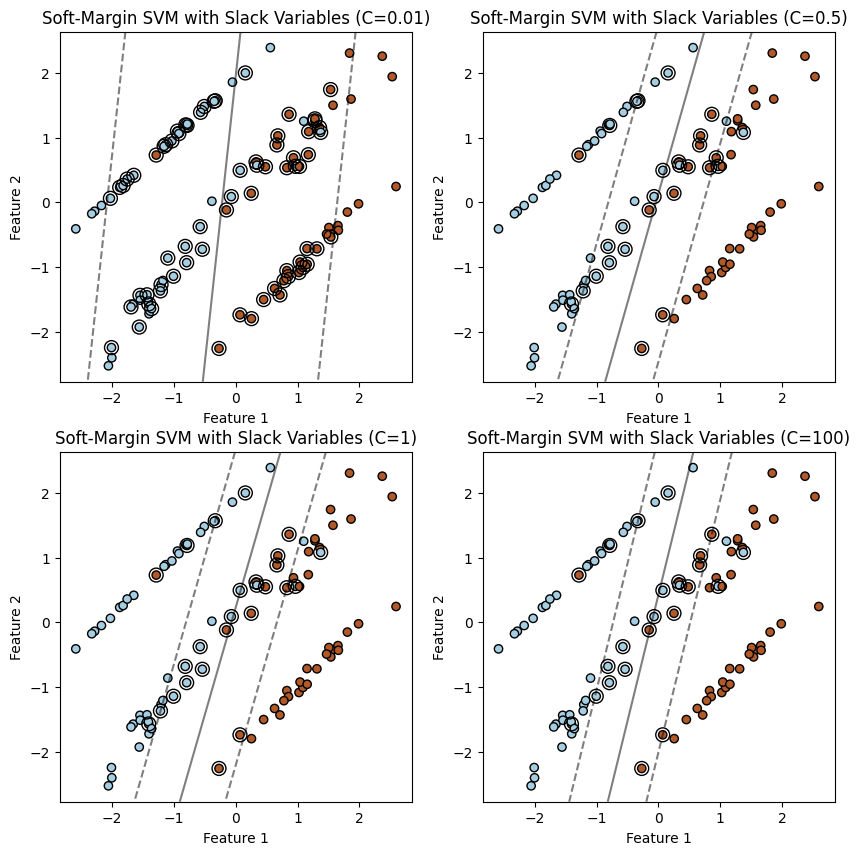

In [45]:

Cs = [0.01,0.5,1,100]
slack_analysis(Cs)


The optimization problem for a soft-margin SVM can be expressed as follows:

$ \text{Minimize:} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{N} \xi_i $

$ \text{Subject to:} \quad y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \quad \text{for all data points } (\mathbf{x}_i, y_i) $

$ \quad \xi_i \geq 0 \quad \text{for all } i $

Here:
- $ \mathbf{w} $ is the weight vector.
- $ C $ is the regularization parameter that controls the trade-off between maximizing the margin and allowing misclassifications.
- $ \mathbf{x}_i $ represents the feature vector of the $ i $-th data point.
- $ y_i $ is the corresponding class label (either +1 or -1).
- $ b $ is the bias term.
- $ \xi_i $ is the slack variable associated with the $ i $-th data point, representing the amount by which the point is on the wrong side of the margin or misclassified.
- The summation $ \sum_{i=1}^{N} \xi_i $ captures the total "slack" or misclassification across all data points.
- The constraints $ y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i $ ensure that data points are correctly classified with a margin greater than or equal to 1, allowing some slack for misclassifications.
- The constraints $ \xi_i \geq 0 $ enforce that slack variables are non-negative.


[]
yfunc:  -0.33 
y:  -1
yfunc:  -0.55 
y:  -1
yfunc:  0.66 
y:  1
yfunc:  -1.1 
y:  -1
yfunc:  1.65 
y:  1
yfunc:  2.09 
y:  1
yfunc:  -0.11999999999999998 
y:  -1
yfunc:  -0.22 
y:  -1
yfunc:  0.27999999999999997 
y:  1
yfunc:  -0.4799999999999999 
y:  -1
yfunc:  0.72 
y:  1
yfunc:  0.9199999999999999 
y:  1
yfunc:  -0.44999999999999996 
y:  -1
yfunc:  -0.7699999999999999 
y:  -1
yfunc:  0.94 
y:  1
yfunc:  -1.5799999999999998 
y:  -1
yfunc:  2.3699999999999997 
y:  1
yfunc:  3.01 
y:  1
yfunc:  -0.23999999999999996 
y:  -1
yfunc:  -0.43999999999999995 
y:  -1
yfunc:  0.5599999999999998 
y:  1
yfunc:  -0.9599999999999997 
y:  -1
yfunc:  1.4399999999999997 
y:  1
yfunc:  1.8399999999999996 
y:  1
yfunc:  -0.029999999999999943 
y:  -1
yfunc:  -0.1099999999999999 
y:  -1
yfunc:  0.17999999999999988 
y:  1
yfunc:  -0.3399999999999998 
y:  -1
yfunc:  0.5099999999999998 
y:  1
yfunc:  0.6699999999999995 
y:  1
yfunc:  -0.35999999999999993 
y:  -1
yfunc:  -0.6599999999999999 
y:  -1
yfunc: 

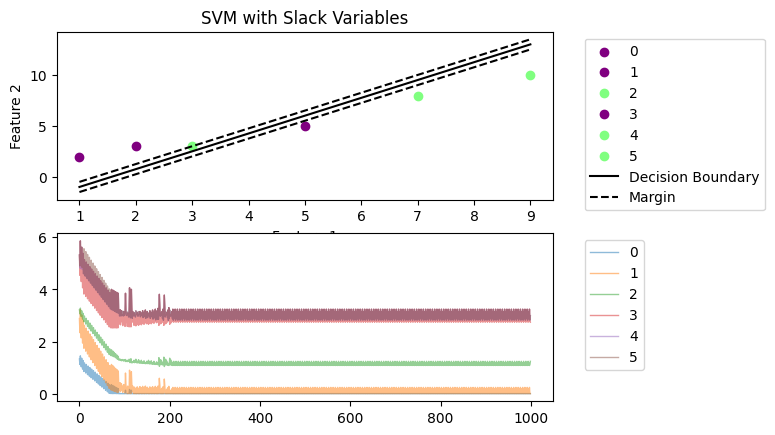

In [102]:
import numpy as np


# Define hinge loss function
def hinge_loss(w, b, X, y):
    loss = 0
    losses=[]
    for i in range(len(X)):
        print('yfunc: ',y[i] * (np.dot(w, X[i]) + b),'\ny: ',y[i])
        loss += max(0, 1 - y[i] * (np.dot(w, X[i]) + b))
        print('loss: ',loss)
        losses.append(loss)
    return loss / len(X), losses

def slack_analysis(X,y):
    # Initialize parameters
    w = np.zeros(X.shape[1])  # Weight vector
    b = 0                     # Bias term
    C = 1                     # Slack variable coefficient
    lr = 0.01                 # Learning rate
    epochs = 1000             # Number of iterations


    # Gradient descent optimization
    losses=[]
    slacks = np.empty((0,len(y)))
    print(slacks)

    
    for epoch in range(epochs):
        # Compute gradients
        w_gradient = np.zeros(X.shape[1])
        b_gradient = 0
        for i in range(len(X)):
            if y[i] * (np.dot(w, X[i]) + b) >= 1:
                w_gradient += 0
                b_gradient += 0
            else:
                w_gradient -= C * y[i] * X[i]
                b_gradient -= C * y[i]
        
        # Update parameters
        w -= lr * w_gradient
        b -= lr * b_gradient
        
        # Compute loss
        loss,all_loss = hinge_loss(w, b, X, y)
        losses.append(loss)
        slacks = np.vstack((slacks,all_loss))
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}, Loss: {loss}")
    # Print final parameters
    print("Final parameters:")
    print("Weight vector:", w)
    print("Bias term:", b)


    fig,axs = plt.subplots(2)


    

    
    for i in range(len(y)):
        colours = [c*0.5 for c in [1,1+y[i],1]]
        axs[0].scatter(X[i,0],X[i,1],color=colours,label=str(i))
        axs[1].plot(range(epochs),slacks[:,i],linewidth=1,label=str(i),alpha=0.5)
    # axs[0].legend()
    


    # Plot the decision boundary and margins
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_values = (-w[0] / w[1]) * x_values - (b / w[1])
    margin = 1 / np.sqrt(np.sum(w ** 2))
    upper_margin = y_values + margin / np.sqrt(1 + (w[0] / w[1]) ** 2)
    lower_margin = y_values - margin / np.sqrt(1 + (w[0] / w[1]) ** 2)

    axs[0].plot(x_values, y_values, label='Decision Boundary', color='black')
    axs[0].plot(x_values, upper_margin, 'k--', label='Margin')
    axs[0].plot(x_values, lower_margin, 'k--')

    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Feature 2')
    axs[0].set_title('SVM with Slack Variables')
    axs[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    axs[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    

    return slacks

# Generate some sample data
np.random.seed(0)
X = np.array([[1, 2], [2, 3], [3, 3], [5, 5], [7, 8], [9, 10]])
y = np.array([-1, -1, 1, -1, 1, 1])

slacks = slack_analysis(X,y)
print(np.shape(slacks))

Epoch 100, Loss: 0.18666666666666643
Epoch 200, Loss: 0.13666666666666674
Epoch 300, Loss: 0.10833333333333457
Epoch 400, Loss: 0.093333333333336
Epoch 500, Loss: 0.06999999999999999
Epoch 600, Loss: 0.0433333333333387
Epoch 700, Loss: 0.02166666666667309
Epoch 800, Loss: 0.0
Epoch 900, Loss: 0.0
Epoch 1000, Loss: 0.0
Final parameters:
Weight vector: [ 1.17 -0.16]
Bias term: -4.039999999999958


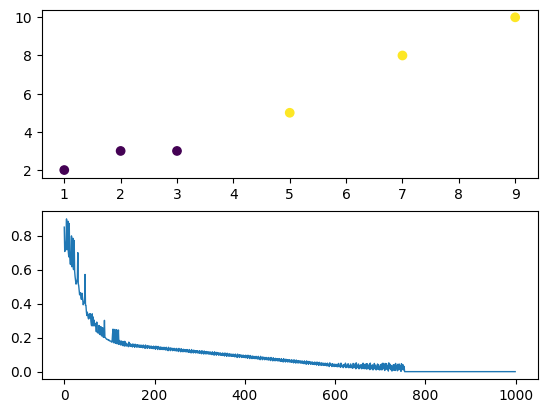

In [61]:
X = np.array([[1, 2], [2, 3], [3, 3], [5, 5], [7, 8], [9, 10]])
y = np.array([-1, -1, -1, 1, 1, 1])

slack_analysis(X,y)